# Metabolic Syndrome Prediction and Healthcare Plan Recommendation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Getting the Data..

In [2]:
# Load dataset
data = pd.read_csv('dataset.csv',skiprows=1)

# Preview the dataset
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_29544\4278663422.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv',skiprows=1)


,"Gender(0=female, 1=male)",Age(years),Neutrophil percentage(%),Lymphocyte percentage(%),Neutrophil count(10^9/L),Mean red blood cell volume(fL),Mean hemoglobin concentration(g/L),RBC distribution width SD,Mean platelet volume(fL),Platelet distribution width standard deviation,...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
0,1,53,5.7,72.6,3.40,102.4,322.0,49.6,10.4,12.3,...,19.56,66,118,65,4.61,2.74,4.00,0.91,1.29,0
1,1,54,12.6,85.0,2.47,93.1,342.0,52.1,10.5,12.8,...,22.49,81,119,70,4.82,3.36,5.11,0.99,1.43,0
2,1,34,13.8,56.0,0.43,87.2,317.0,46.2,9.6,11.1,...,22.86,73,113,71,4.58,2.93,3.90,0.83,1.33,0
3,1,31,20.0,71.9,1.71,88.4,342.0,46.2,10.8,11.9,...,20.32,62,94,60,4.22,1.94,3.56,0.94,1.45,0
4,1,59,20.3,71.1,0.82,78.0,321.0,42.3,9.4,12.3,...,29.04,95,138,73,4.66,2.25,4.29,0.76,1.50,0


# Pre-Processing

In [3]:
# 1.Drop unnecessary columns (if any)
data = data.drop(columns=['...'], errors='ignore')  # Remove placeholder if needed

In [4]:
#2.Converting Types 
data = data.apply(pd.to_numeric, errors='coerce')


In [5]:
data.head()

,"Gender(0=female, 1=male)",Age(years),Neutrophil percentage(%),Lymphocyte percentage(%),Neutrophil count(10^9/L),Mean red blood cell volume(fL),Mean hemoglobin concentration(g/L),RBC distribution width SD,Mean platelet volume(fL),Platelet distribution width standard deviation,...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
0,1,53,5.7,72.6,3.40,102.4,322.0,49.6,10.4,12.3,...,19.56,66,118,65,4.61,2.74,4.00,0.91,1.29,0
1,1,54,12.6,85.0,2.47,93.1,342.0,52.1,10.5,12.8,...,22.49,81,119,70,4.82,3.36,5.11,0.99,1.43,0
2,1,34,13.8,56.0,0.43,87.2,317.0,46.2,9.6,11.1,...,22.86,73,113,71,4.58,2.93,3.90,0.83,1.33,0
3,1,31,20.0,71.9,1.71,88.4,342.0,46.2,10.8,11.9,...,20.32,62,94,60,4.22,1.94,3.56,0.94,1.45,0
4,1,59,20.3,71.1,0.82,78.0,321.0,42.3,9.4,12.3,...,29.04,95,138,73,4.66,2.25,4.29,0.76,1.50,0


In [6]:
data.dtypes.to_frame()

,0
"Gender(0=female, 1=male)",int64
Age(years),int64
Neutrophil percentage(%),float64
Lymphocyte percentage(%),float64
Neutrophil count(10^9/L),float64
Mean red blood cell volume(fL),float64
Mean hemoglobin concentration(g/L),float64
RBC distribution width SD,float64
Mean platelet volume(fL),float64
Platelet distribution width standard deviation,float64


In [7]:
# 3.Normalize numerical features
scaler = StandardScaler()
data.iloc[:, 1:-1] = scaler.fit_transform(data.iloc[:, 1:-1])  # Exclude target column from scaling


In [8]:
# 4.Missing Values
data.isnull().sum().to_frame()

,0
"Gender(0=female, 1=male)",0
Age(years),0
Neutrophil percentage(%),0
Lymphocyte percentage(%),0
Neutrophil count(10^9/L),0
Mean red blood cell volume(fL),0
Mean hemoglobin concentration(g/L),0
RBC distribution width SD,0
Mean platelet volume(fL),0
Platelet distribution width standard deviation,0


In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum().to_frame()

,0
"Gender(0=female, 1=male)",0
Age(years),0
Neutrophil percentage(%),0
Lymphocyte percentage(%),0
Neutrophil count(10^9/L),0
Mean red blood cell volume(fL),0
Mean hemoglobin concentration(g/L),0
RBC distribution width SD,0
Mean platelet volume(fL),0
Platelet distribution width standard deviation,0


In [11]:
target_col = 'Metabolic syndrome(0=no, 1=yes)'  
if target_col not in data.columns:
    raise ValueError(f"Target column '{target_col}' not found in the dataset.")

In [12]:
data.head()

,"Gender(0=female, 1=male)",Age(years),Neutrophil percentage(%),Lymphocyte percentage(%),Neutrophil count(10^9/L),Mean red blood cell volume(fL),Mean hemoglobin concentration(g/L),RBC distribution width SD,Mean platelet volume(fL),Platelet distribution width standard deviation,...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
9,0,-1.363642,-3.926474,2.294881,-1.612170,-1.147564,-4.362333,-0.925572,0.582172,-0.101548,...,-0.729845,-0.536040,0.462037,0.759002,0.308374,-2.019136,-2.763957,-0.628088,-1.981122,0
16,1,0.960223,-3.713155,4.216888,-1.694172,0.197151,0.616277,-0.902071,-0.875199,-0.335468,...,-1.169970,-1.439824,-1.421992,-1.706255,-0.011980,-0.362402,-0.678092,-0.241172,-0.797128,0
25,1,-1.208718,-3.512384,4.078614,-1.967512,0.105048,0.170661,-0.643555,0.275357,0.693778,...,-1.205730,-1.439824,-1.034104,-1.366220,-0.496418,-1.716813,-1.077301,-0.828987,1.669527,0
30,1,0.727836,-3.449643,3.885030,-1.953845,0.307676,-4.393065,-0.479045,1.502616,1.255186,...,-0.537291,-0.536040,-1.366580,-1.366220,0.613101,0.121316,0.818939,-0.471833,0.485533,0
33,1,-1.286180,-3.424547,3.248971,-1.489167,0.233993,-0.351786,-0.408540,-0.108162,0.459859,...,-1.439546,-1.620581,-1.200342,-1.196202,-0.301080,-0.301937,-0.488468,-0.419749,0.880198,0


In [13]:
data.to_csv("Dataset_After_Preprocess.csv",index = False)

# Module -1

# Feature Selection

# 1. Filter Method

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest

# Pre-Processing

In [15]:
# Separate features and target variable
X = data.drop(columns=[target_col])  # Features
y = data[target_col]  # Target variable

In [16]:
# Encode target if necessary (assuming binary classification)
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [17]:
# Min-Max Scaling for Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Analysis of Filter Methods

In [19]:
# Store accuracy results for plotting
accuracy_results = {}

In [20]:
# 1. Correlation Coefficient Method
correlation_scores = {}
for col in X.columns:
    correlation_scores[col], _ = pearsonr(X_train[:, X.columns.get_loc(col)], y_train)


In [21]:
# Select top K features based on correlation
sorted_correlation_features = sorted(correlation_scores.items(), key=lambda x: abs(x[1]), reverse=True)
top_correlation_features = [x[0] for x in sorted_correlation_features[:5]]  # Select top 5 features
X_train_corr = X_train[:, [X.columns.get_loc(col) for col in top_correlation_features]]
X_test_corr = X_test[:, [X.columns.get_loc(col) for col in top_correlation_features]]


In [22]:
# Train and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_corr, y_train)
y_pred_corr = clf.predict(X_test_corr)
accuracy_corr = accuracy_score(y_test, y_pred_corr)
accuracy_results['Correlation Coefficient'] = accuracy_corr

In [23]:
# 2. Mutual Information Method
mi = mutual_info_classif(X_train, y_train)
mi_selector = SelectKBest(mutual_info_classif, k=5)
X_train_mi = mi_selector.fit_transform(X_train, y_train)
X_test_mi = mi_selector.transform(X_test)

In [24]:
# Train and evaluate
clf.fit(X_train_mi, y_train)
y_pred_mi = clf.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
accuracy_results['Mutual Information'] = accuracy_mi


In [25]:
# 3. Chi-Square Method (Applicable for Categorical Data)
X_train_chi2 = np.abs(X_train)  # chi2 requires non-negative input
X_test_chi2 = np.abs(X_test)
chi2_selector = SelectKBest(chi2, k=5)
X_train_chi2 = chi2_selector.fit_transform(X_train_chi2, y_train)
X_test_chi2 = chi2_selector.transform(X_test_chi2)

In [26]:
# Train and evaluate
clf.fit(X_train_chi2, y_train)
y_pred_chi2 = clf.predict(X_test_chi2)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
accuracy_results['Chi-Square'] = accuracy_chi2

In [27]:
# 4. Variance Threshold Method (Remove Low Variance Features)
vt_selector = VarianceThreshold(threshold=0.01)
X_train_vt = vt_selector.fit_transform(X_train)
X_test_vt = vt_selector.transform(X_test)

In [28]:
# Train and evaluate
clf.fit(X_train_vt, y_train)
y_pred_vt = clf.predict(X_test_vt)
accuracy_vt = accuracy_score(y_test, y_pred_vt)
accuracy_results['Variance Threshold'] = accuracy_vt

In [29]:
# 5. Plot Accuracy Results
methods = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

In [30]:
accuracies

[0.9278350515463918,
 0.9321758003255561,
 0.8534997287032013,
 0.8969072164948454]

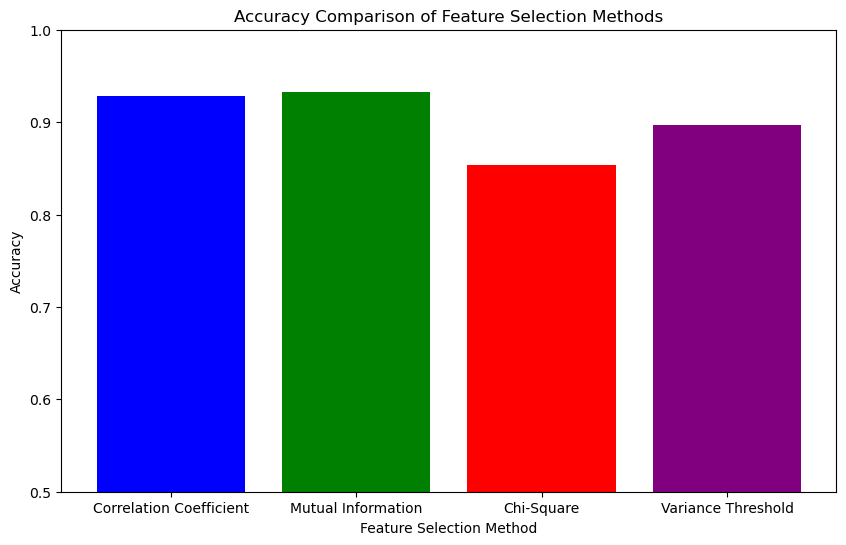

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Feature Selection Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Feature Selection Methods')
plt.ylim(0.5, 1)
plt.show()


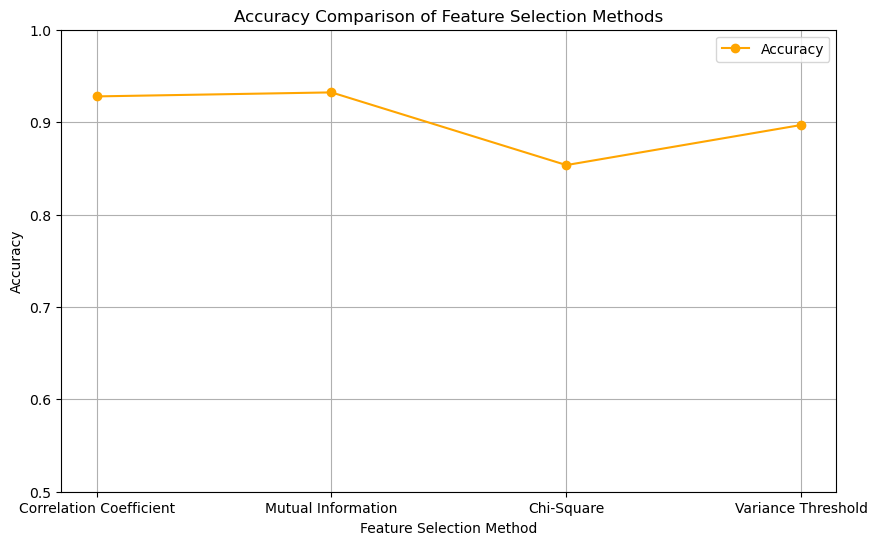

In [32]:
# Plot Accuracy Results using Line Chart
plt.figure(figsize=(10, 6))
plt.plot(methods, accuracies, marker='o', linestyle='-', color='orange', label='Accuracy')
plt.xlabel('Feature Selection Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Feature Selection Methods')
plt.ylim(0.5, 1)  # Adjust this range as per your dataset's accuracy scores
plt.grid(True)
plt.legend()
plt.show()

# Filter Method using Correlation Coefficient

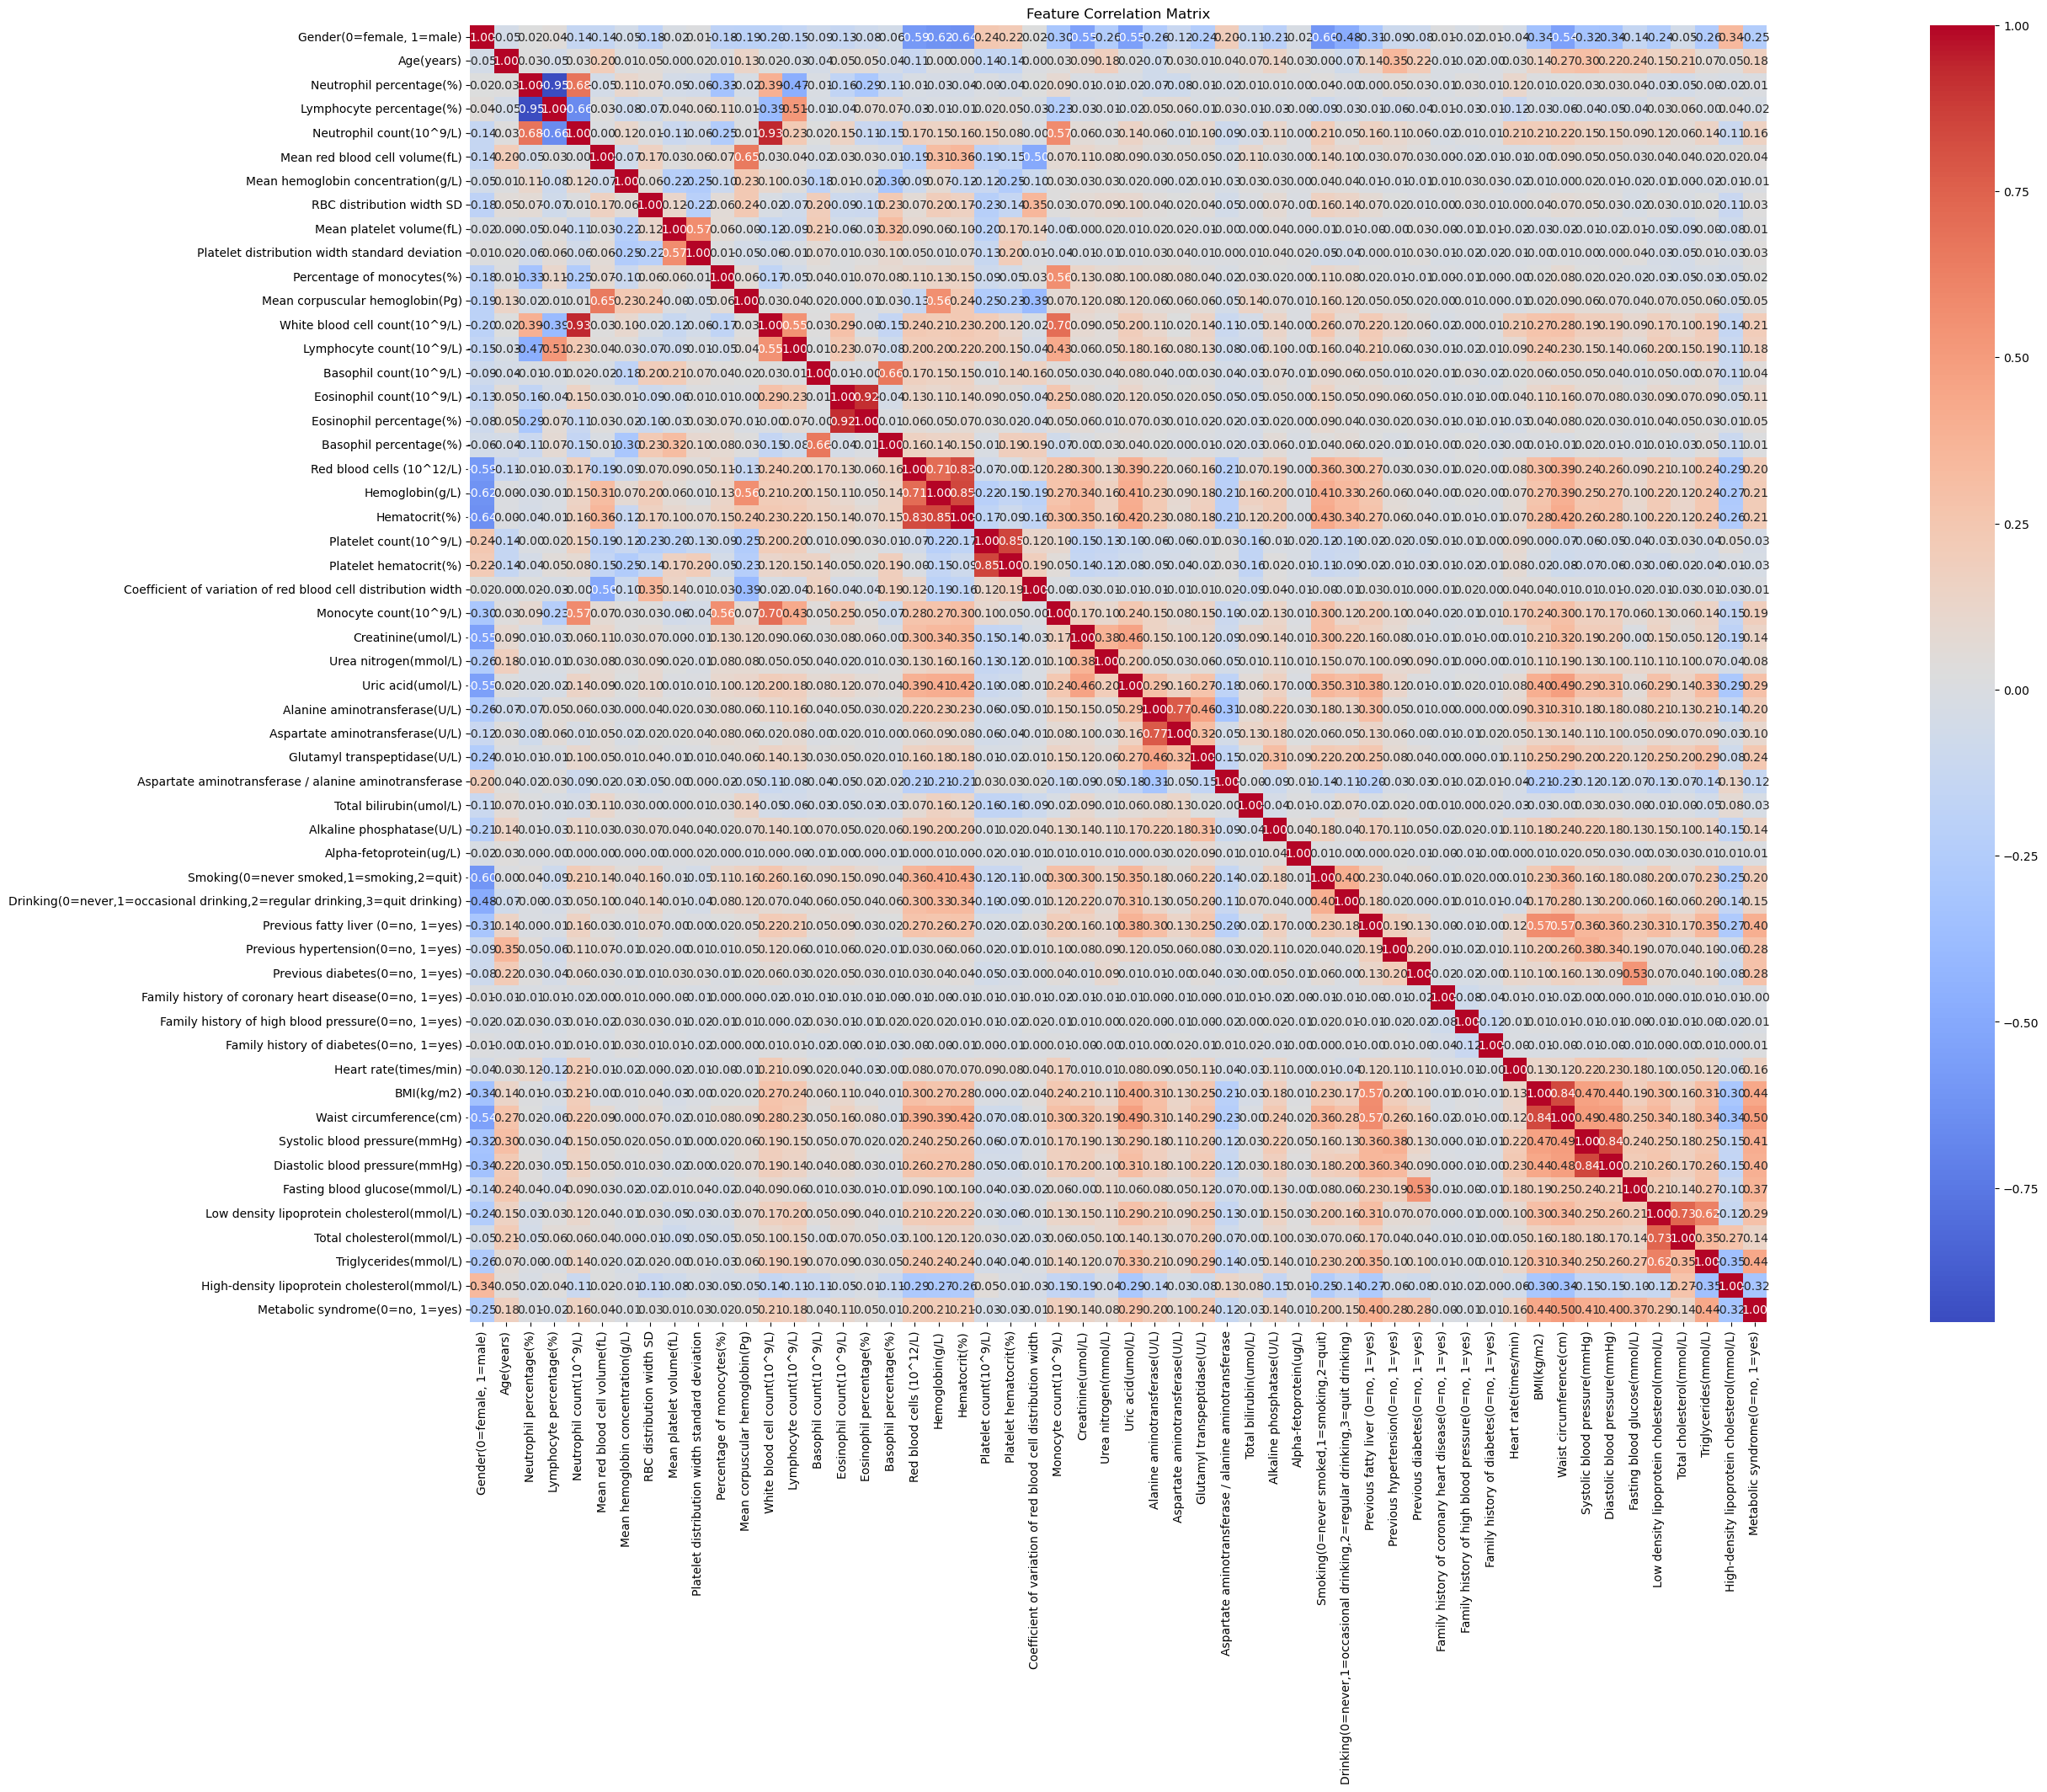

In [33]:
# Step 5: Visualize Feature Correlation
plt.figure(figsize=(50, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [34]:
X = data.drop(columns=['Metabolic syndrome(0=no, 1=yes)'])
y = data['Metabolic syndrome(0=no, 1=yes)']

# Step 3: Feature Selection using Correlation Coefficient
def feature_selection_correlation(X, y, threshold=0.1):
    """
    Perform feature selection using correlation coefficient.
    Keeps features that have a correlation > threshold with the target.
    """
    # Combine features with the target to calculate correlations
    df = X.copy()
    df['target'] = y

    # Calculate correlations
    correlations = df.corr()

    # Extract correlations of features with the target variable
    target_corr = correlations['target'].drop('target')

    # Select features with correlation above the threshold
    selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

    print("Selected Features based on Correlation Coefficient:")
    print(selected_features)

    return X[selected_features]

# Apply feature selection
threshold = 0.08  # Set a threshold (adjust as needed)
X_selected = feature_selection_correlation(X, y, threshold)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = rf_model.predict(X_test)


Selected Features based on Correlation Coefficient:
['Gender(0=female, 1=male)', 'Age(years)', 'Neutrophil count(10^9/L)', 'White blood cell count(10^9/L)', 'Lymphocyte count(10^9/L)', 'Eosinophil count(10^9/L)', 'Red blood cells (10^12/L)', 'Hemoglobin(g/L)', 'Hematocrit(%)', 'Monocyte count(10^9/L)', 'Creatinine(umol/L)', 'Uric acid(umol/L)', 'Alanine aminotransferase(U/L)', 'Aspartate aminotransferase(U/L)', 'Glutamyl transpeptidase(U/L)', 'Aspartate aminotransferase / alanine aminotransferase', 'Alkaline phosphatase(U/L)', 'Smoking(0=never smoked,1=smoking,2=quit)', 'Drinking(0=never,1=occasional drinking,2=regular drinking,3=quit drinking)', 'Previous fatty liver (0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)', 'Heart rate(times/min)', 'BMI(kg/m2)', 'Waist circumference(cm)', 'Systolic blood pressure(mmHg)', 'Diastolic blood pressure(mmHg)', 'Fasting blood glucose(mmol/L)', 'Low density lipoprotein cholesterol(mmol/L)', 'Total cholesterol(mmo

In [35]:
len(X_selected.columns)

32

In [36]:

# Print accuracy and classification report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred)*100)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 98.48073792729247


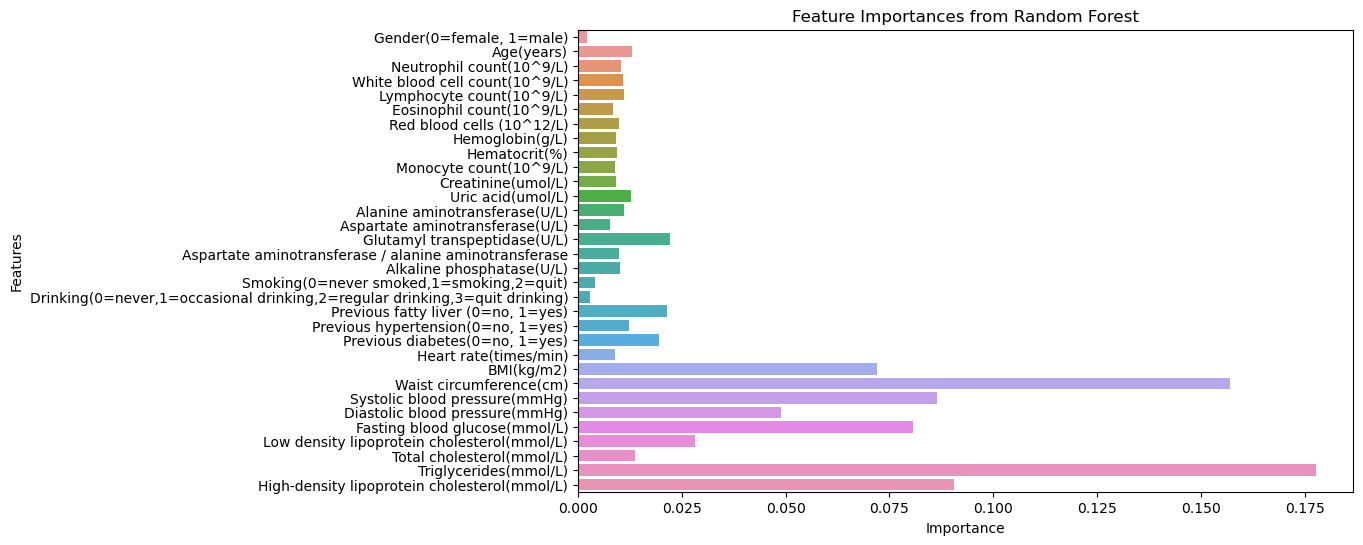

In [37]:

# Optional: Visualize Feature Importances
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_selected.columns)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# 2.Wrapper Method (GA)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Step 7: Genetic Algorithm for Feature Selection
def init_population(n, c):
    """
    Initialize a binary-encoded population.
    Args:
        n: Number of individuals (population size)
        c: Number of features
    Returns:
        Initial population as a numpy array
    """
    return np.random.randint(2, size=(n, c))  # n individuals, c features

def single_point_crossover(population):
    """
    Perform single-point crossover between pairs of individuals.
    """
    r, c = population.shape
    for i in range(0, r, 2):
        if i + 1 < r:  # Ensure valid pair
            n = np.random.randint(1, c)  # Random crossover point
            temp = population[i][:n].copy()
            population[i][:n] = population[i + 1][:n]
            population[i + 1][:n] = temp
    return population

def flip_mutation(population, mutation_rate=0.1):
    """
    Apply flip mutation with a fixed mutation rate.
    """
    mutation_indices = np.random.rand(*population.shape) < mutation_rate
    population[mutation_indices] = 1 - population[mutation_indices]  # Flip bits
    return population

def get_fitness(X, y, population, feature_names):
    """
    Evaluate the fitness of each individual in the population using Random Forest.
    Args:
        X: Input features
        y: Target variable
        population: Binary-encoded population
        feature_names: List of all feature names
    Returns:
        List of fitness scores for the population
    """
    fitness = []
    for individual in population:
        # Select features corresponding to 1s in the binary encoding
        selected_features = [feature_names[i] for i in range(len(feature_names)) if individual[i] == 1]
        if not selected_features:  # If no features selected, fitness = 0
            fitness.append(0)
            continue

        # Train and evaluate Random Forest model with selected features
        X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, rf.predict(X_test))
        fitness.append(accuracy)
    return fitness

def genetic_algorithm(X, y, feature_names, n_generations=20, population_size=10, mutation_rate=0.1):
    """
    Genetic Algorithm to optimize feature selection.
    Args:
        X: Input features
        y: Target variable
        feature_names: List of all feature names
        n_generations: Number of generations
        population_size: Size of the population
        mutation_rate: Mutation rate
    Returns:
        Best feature subset and its fitness score
    """
    num_features = len(feature_names)
    population = init_population(population_size, num_features)

    best_solution = None
    best_score = 0

    for generation in range(n_generations):
        print(f"Generation {generation + 1}")
        fitness = get_fitness(X, y, population, feature_names)

        # Find the best individual in this generation
        max_fitness = max(fitness)
        if max_fitness > best_score:
            best_score = max_fitness
            best_solution = population[fitness.index(max_fitness)].copy()

        print(f"  Best Fitness in Generation {generation + 1}: {max_fitness:.4f}")

        # Select the top 50% individuals to form the next generation
        sorted_indices = np.argsort(fitness)[::-1]
        top_individuals = population[sorted_indices[:population_size // 2]]

        # Generate new population via crossover and mutation
        population = single_point_crossover(np.vstack([top_individuals] * 2))  # Duplicate for crossover
        population = flip_mutation(population, mutation_rate)

    # Decode the best solution
    selected_features = [feature_names[i] for i in range(num_features) if best_solution[i] == 1]
    print("\nBest Feature Subset Found by Genetic Algorithm:")
    print(selected_features)
    print(f"Best Fitness Score: {best_score:.4f}")

    return selected_features, best_score

# Step 8: Run Genetic Algorithm for Feature Selection
feature_names = X_selected.columns.tolist()  # Features selected by correlation
best_features, best_fitness = genetic_algorithm(X_selected, y, feature_names)


Generation 1
  Best Fitness in Generation 1: 0.9859
Generation 2
  Best Fitness in Generation 2: 0.9718
Generation 3
  Best Fitness in Generation 3: 0.9723
Generation 4
  Best Fitness in Generation 4: 0.9750
Generation 5
  Best Fitness in Generation 5: 0.9761
Generation 6
  Best Fitness in Generation 6: 0.9734
Generation 7
  Best Fitness in Generation 7: 0.9767
Generation 8
  Best Fitness in Generation 8: 0.9745
Generation 9
  Best Fitness in Generation 9: 0.9772
Generation 10
  Best Fitness in Generation 10: 0.9881
Generation 11
  Best Fitness in Generation 11: 0.9902
Generation 12
  Best Fitness in Generation 12: 0.9897
Generation 13
  Best Fitness in Generation 13: 0.9891
Generation 14
  Best Fitness in Generation 14: 0.9897
Generation 15
  Best Fitness in Generation 15: 0.9843
Generation 16
  Best Fitness in Generation 16: 0.9881
Generation 17
  Best Fitness in Generation 17: 0.9902
Generation 18
  Best Fitness in Generation 18: 0.9897
Generation 19
  Best Fitness in Generation 19:

In [39]:
len(best_features)

19

In [40]:

# Step 9: Evaluate the Final Model with Selected Features
X_train, X_test, y_train, y_test = train_test_split(X_selected[best_features], y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\nFinal Evaluation with Selected Features:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))



Final Evaluation with Selected Features:
Accuracy on Test Set: 0.9902333152468801


In [41]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np

# Ensure NumPy compatibility
np.complex128  # Explicit check for compatibility


# Load and preprocess dataset
data = pd.read_csv('dataset.csv', skiprows=1, low_memory=False)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)


columns_to_extract = [
    'Neutrophil count(10^9/L)',
    'Lymphocyte count(10^9/L)',
    'Eosinophil count(10^9/L)',
    'Hemoglobin(g/L)',
    'Monocyte count(10^9/L)',
    'Glutamyl transpeptidase(U/L)',
    'Aspartate aminotransferase / alanine aminotransferase',
    'Previous fatty liver (0=no, 1=yes)',
    'Previous hypertension(0=no, 1=yes)',
    'Previous diabetes(0=no, 1=yes)',
    'Heart rate(times/min)',
    'BMI(kg/m2)',
    'Waist circumference(cm)',
    'Systolic blood pressure(mmHg)',
    'Diastolic blood pressure(mmHg)',
    'Fasting blood glucose(mmol/L)',
    'Low density lipoprotein cholesterol(mmol/L)',
    'Total cholesterol(mmol/L)',
    'Triglycerides(mmol/L)',
    'High-density lipoprotein cholesterol(mmol/L)',
    'Metabolic syndrome(0=no, 1=yes)'
]

features_extracted = data[columns_to_extract]
features_extracted.head()

,Neutrophil count(10^9/L),Lymphocyte count(10^9/L),Eosinophil count(10^9/L),Hemoglobin(g/L),Monocyte count(10^9/L),Glutamyl transpeptidase(U/L),Aspartate aminotransferase / alanine aminotransferase,"Previous fatty liver (0=no, 1=yes)","Previous hypertension(0=no, 1=yes)","Previous diabetes(0=no, 1=yes)",...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
9,1.85,2.96,0.47,141.0,1.03,23.0,0.68,0,0,0,...,21.68,75,133,85,5.31,1.22,2.06,0.67,0.81,0
16,1.73,3.39,0.07,117.0,0.39,14.0,1.69,0,0,0,...,20.08,65,99,56,4.90,2.59,4.15,1.19,1.17,0
25,1.33,2.44,0.04,108.0,0.28,10.0,1.67,0,0,0,...,19.95,65,106,60,4.28,1.47,3.75,0.40,1.92,0
30,1.35,2.38,0.10,131.0,0.23,19.0,1.14,0,0,0,...,22.38,75,100,60,5.70,2.99,5.65,0.88,1.56,0
33,2.03,3.28,0.39,109.0,0.40,13.0,0.66,0,0,0,...,19.10,63,103,62,4.53,2.64,4.34,0.95,1.68,0


In [42]:
features_extracted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9215 entries, 9 to 39120
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Neutrophil count(10^9/L)                               9215 non-null   float64
 1   Lymphocyte count(10^9/L)                               9215 non-null   float64
 2   Eosinophil count(10^9/L)                               9215 non-null   float64
 3   Hemoglobin(g/L)                                        9215 non-null   float64
 4   Monocyte count(10^9/L)                                 9215 non-null   float64
 5   Glutamyl transpeptidase(U/L)                           9215 non-null   float64
 6   Aspartate aminotransferase / alanine aminotransferase  9215 non-null   float64
 7   Previous fatty liver (0=no, 1=yes)                     9215 non-null   int64  
 8   Previous hypertension(0=no, 1=yes)                  

# Module -2 

# Auto-Encoders Pre-Training

In [43]:
target = data[target_col]

# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_extracted)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    normalized_features, target, test_size=0.2, random_state=42
)


In [44]:
from keras.models import Model
from keras.layers import Input, Dense

# Autoencoder for dimensionality reduction
input_dim = X_train.shape[1]
encoding_dim = 9  # Reduced dimensionality

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=8, shuffle=True, validation_split=0.2, verbose=0)

# Encoder for dimensionality reduction
encoder = Model(input_layer, encoded)
compressed_features = encoder.predict(normalized_features)


288/288 [==============================] - 1s 2ms/step


In [45]:
compressed_features

array([[0.        , 1.7504532 , 2.106375  , ..., 0.25686756, 3.3230476 ,
        2.2566574 ],
       [0.        , 0.77246726, 1.1344247 , ..., 0.02135593, 2.5907028 ,
        0.39629   ],
       [0.        , 0.652534  , 0.593702  , ..., 0.08930722, 2.2649775 ,
        0.8437987 ],
       ...,
       [0.        , 1.3707677 , 2.2601814 , ..., 5.530243  , 2.1533434 ,
        3.844985  ],
       [0.        , 1.8599906 , 1.8450766 , ..., 1.1631551 , 2.7312586 ,
        2.1355147 ],
       [0.        , 2.54448   , 1.5588124 , ..., 2.0441074 , 2.3854587 ,
        2.0050964 ]], dtype=float32)

In [46]:
print(compressed_features.shape)


(9215, 9)


In [47]:
num_compressed_features = compressed_features.shape[1]
print("Number of compressed features:", num_compressed_features)


Number of compressed features: 9


# Constructing Bayesian Network (Hill Climb Search & BIC Score) - Basic

In [48]:
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination

estimator = HillClimbSearch(features_extracted)
best_model = estimator.estimate(scoring_method=BicScore(features_extracted))
features_extracted.head()


  0%|          | 0/1000000 [00:00<?, ?it/s]

,Neutrophil count(10^9/L),Lymphocyte count(10^9/L),Eosinophil count(10^9/L),Hemoglobin(g/L),Monocyte count(10^9/L),Glutamyl transpeptidase(U/L),Aspartate aminotransferase / alanine aminotransferase,"Previous fatty liver (0=no, 1=yes)","Previous hypertension(0=no, 1=yes)","Previous diabetes(0=no, 1=yes)",...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
9,1.85,2.96,0.47,141.0,1.03,23.0,0.68,0,0,0,...,21.68,75,133,85,5.31,1.22,2.06,0.67,0.81,0
16,1.73,3.39,0.07,117.0,0.39,14.0,1.69,0,0,0,...,20.08,65,99,56,4.90,2.59,4.15,1.19,1.17,0
25,1.33,2.44,0.04,108.0,0.28,10.0,1.67,0,0,0,...,19.95,65,106,60,4.28,1.47,3.75,0.40,1.92,0
30,1.35,2.38,0.10,131.0,0.23,19.0,1.14,0,0,0,...,22.38,75,100,60,5.70,2.99,5.65,0.88,1.56,0
33,2.03,3.28,0.39,109.0,0.40,13.0,0.66,0,0,0,...,19.10,63,103,62,4.53,2.64,4.34,0.95,1.68,0


In [49]:
print("Learned Structure:")
print(best_model.edges())


Learned Structure:
[('Previous fatty liver (0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)'), ('Previous hypertension(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)'), ('Waist circumference(cm)', 'Previous fatty liver (0=no, 1=yes)'), ('Waist circumference(cm)', 'Metabolic syndrome(0=no, 1=yes)'), ('Metabolic syndrome(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)'), ('Metabolic syndrome(0=no, 1=yes)', 'Systolic blood pressure(mmHg)'), ('Metabolic syndrome(0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)'), ('Metabolic syndrome(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)')]


In [50]:
extracted_edges = best_model.edges()
for i in extracted_edges:
    print(i)

('Previous fatty liver (0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)')
('Previous hypertension(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)')
('Waist circumference(cm)', 'Previous fatty liver (0=no, 1=yes)')
('Waist circumference(cm)', 'Metabolic syndrome(0=no, 1=yes)')
('Metabolic syndrome(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)')
('Metabolic syndrome(0=no, 1=yes)', 'Systolic blood pressure(mmHg)')
('Metabolic syndrome(0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)')
('Metabolic syndrome(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)')


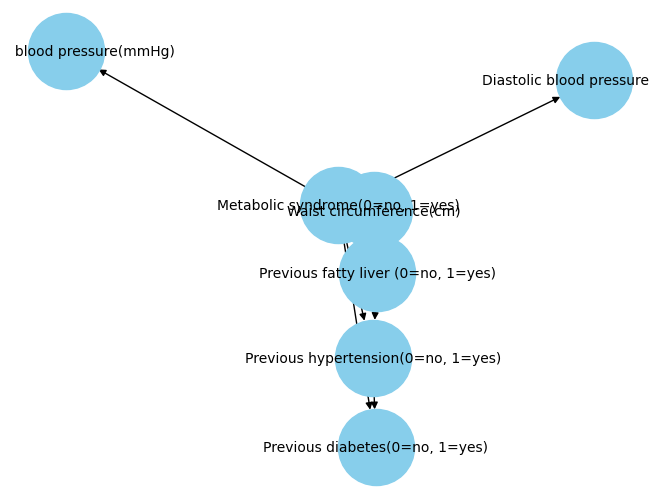

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph(best_model.edges())
nx.draw(graph, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.show()

In [52]:
model = BayesianNetwork(best_model.edges())

# Use Maximum Likelihood Estimator to estimate the parameters (CPDs)
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference using Variable Elimination
inference = VariableElimination(model)


In [53]:
extracted_edges = best_model.edges()
for i in extracted_edges:
    print(i)

('Previous fatty liver (0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)')
('Previous hypertension(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)')
('Waist circumference(cm)', 'Previous fatty liver (0=no, 1=yes)')
('Waist circumference(cm)', 'Metabolic syndrome(0=no, 1=yes)')
('Metabolic syndrome(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)')
('Metabolic syndrome(0=no, 1=yes)', 'Systolic blood pressure(mmHg)')
('Metabolic syndrome(0=no, 1=yes)', 'Previous hypertension(0=no, 1=yes)')
('Metabolic syndrome(0=no, 1=yes)', 'Previous diabetes(0=no, 1=yes)')


In [54]:
hill_climb_features = [
    'Previous fatty liver (0=no, 1=yes)',
    'Previous hypertension(0=no, 1=yes)',
    'Previous diabetes(0=no, 1=yes)',
    'Waist circumference(cm)',
    'Systolic blood pressure(mmHg)',
    'Diastolic blood pressure(mmHg)'
]

In [55]:
evidence = {
    'Previous fatty liver (0=no, 1=yes)': 1,
    'Previous hypertension(0=no, 1=yes)': 0,
    'Previous diabetes(0=no, 1=yes)': 1,
    'Waist circumference(cm)': 76,
    'Systolic blood pressure(mmHg)': 139,
    'Diastolic blood pressure(mmHg)': 88
}


In [56]:
# Example inference: Given certain conditions (e.g., a person has high blood pressure, what is the probability of having metabolic syndrome?)
query_result = inference.query(variables=['Metabolic syndrome(0=no, 1=yes)'],
                               evidence=evidence)
print(query_result)

+------------------------------------+----------------------------------------+
| Metabolic syndrome(0=no, 1=yes)    |   phi(Metabolic syndrome(0=no, 1=yes)) |
+====================================+========================================+
| Metabolic syndrome(0=no, 1=yes)(0) |                                 0.4718 |
+------------------------------------+----------------------------------------+
| Metabolic syndrome(0=no, 1=yes)(1) |                                 0.5282 |
+------------------------------------+----------------------------------------+


In [57]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination

# Load and preprocess dataset
data = pd.read_csv('dataset.csv', skiprows=1, low_memory=False)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Selected features for Bayesian Network Structure Learning
hill_climb_features = [
    'Previous fatty liver (0=no, 1=yes)',
    'Previous hypertension(0=no, 1=yes)',
    'Previous diabetes(0=no, 1=yes)',
    'Waist circumference(cm)',
    'Systolic blood pressure(mmHg)',
    'Diastolic blood pressure(mmHg)',
    'Metabolic syndrome(0=no, 1=yes)'
]

data = data[hill_climb_features]

# Learn Bayesian Network Structure
estimator = HillClimbSearch(data)
best_model = estimator.estimate(scoring_method=BicScore(data))
model = BayesianNetwork(best_model.edges())

# Fit model using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference = VariableElimination(model)

# Evaluate model accuracy
correct_predictions = 0
total_samples = len(data)

for index, row in data.iterrows():
    evidence = row.drop(labels=['Metabolic syndrome(0=no, 1=yes)']).to_dict()
    actual_value = row['Metabolic syndrome(0=no, 1=yes)']
    
    # Get probability distribution
    query_result = inference.query(variables=['Metabolic syndrome(0=no, 1=yes)'], evidence=evidence)
    predicted_prob = query_result.values[1]  # Probability of '1'
    predicted_value = 1 if predicted_prob > 0.6 else 0
    
    if predicted_value == actual_value:
        correct_predictions += 1



  0%|          | 0/1000000 [00:00<?, ?it/s]

In [58]:

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8786


In [59]:
# Save the trained model
import pickle

with open('bayesian_network_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Optimizing the Bayesian Network with GA

In [65]:
hill_data = data[hill_climb_features]
hill_data.head()

,"Previous fatty liver (0=no, 1=yes)","Previous hypertension(0=no, 1=yes)","Previous diabetes(0=no, 1=yes)",Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),"Metabolic syndrome(0=no, 1=yes)"
9,0,0,0,75,133,85,0
16,0,0,0,65,99,56,0
25,0,0,0,65,106,60,0
30,0,0,0,75,100,60,0
33,0,0,0,63,103,62,0


In [66]:
import random
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianNetwork
import numpy as np
import networkx as nx

# Define the Genetic Algorithm for optimizing Bayesian Network structure
class GeneticAlgorithm:
    def __init__(self, data, population_size=10, generations=100, mutation_rate=0.1, crossover_rate=0.7):
        self.data = data
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def initialize_population(self):
        # Generate initial random population (Bayesian Network structures)
        population = []
        for _ in range(self.population_size):
            # Create a random network structure (you could use a random method to generate edges)
            edges = self.random_network_structure()
            population.append(BayesianNetwork(edges))
        return population

    def random_network_structure(self):
        # Generate a random network structure (add edges randomly between nodes)
        # For simplicity, use random edges between nodes
        nodes = self.data.columns
        edges = []
        for i in range(len(nodes)):
            for j in range(i+1, len(nodes)):
                if random.random() > 0.5:  # Randomly add edges
                    edges.append((nodes[i], nodes[j]))
        return edges

    def fitness(self, network):
        # Calculate the BIC score for the Bayesian Network as the fitness function
        bic_score = BicScore(self.data).score(network)
        return bic_score

    def crossover(self, parent1, parent2):
        # Crossover between two parent networks to create offspring
        child_edges = []
        for edge in parent1.edges():
            if random.random() < 0.5:
                child_edges.append(edge)
        for edge in parent2.edges():
            if random.random() < 0.5:
                child_edges.append(edge)
        return BayesianNetwork(child_edges)

    def mutate(self, network):
        # Mutate the network by randomly adding or removing an edge
        nodes = list(network.nodes())  # Get the list of existing nodes in the network
        edges = list(network.edges())  # Convert the edges view to a list

        if random.random() < self.mutation_rate:
            if len(edges) > 0 and random.random() < 0.5:  # Remove an edge
                edge_to_remove = random.choice(edges)
                network.remove_edge(*edge_to_remove)
            else:  # Add a new edge
                new_edge = (random.choice(nodes), random.choice(nodes))

                # Check if both nodes exist in the network (they should)
                if new_edge[0] in network.nodes() and new_edge[1] in network.nodes():
                    # Check if adding this edge would create a cycle
                    if not nx.has_path(network, new_edge[1], new_edge[0]):  # No path from v to u means no cycle
                        network.add_edge(*new_edge)
                    else:
                        # Skip this mutation if a cycle is created
                        pass

        return network

    def select(self, population, fitness_scores):
        # Select individuals based on fitness (roulette wheel selection)
        total_fitness = sum(fitness_scores)
        probabilities = [f / total_fitness for f in fitness_scores]
        selected = random.choices(population, probabilities, k=self.population_size // 2)
        return selected

    def run(self):
        population = self.initialize_population()
        for generation in range(self.generations):
            # Calculate fitness for each individual
            fitness_scores = [self.fitness(network) for network in population]

            # Select parents based on fitness
            parents = self.select(population, fitness_scores)

            # Generate the next generation
            next_population = []
            for i in range(0, len(parents), 2):
                parent1, parent2 = parents[i], parents[i+1]

                # Crossover to generate offspring
                if random.random() < self.crossover_rate:
                    child = self.crossover(parent1, parent2)
                else:
                    child = parent1

                # Mutate the offspring
                child = self.mutate(child)
                next_population.append(child)

            population = next_population

        # Return the best network from the final generation
        final_fitness_scores = [self.fitness(network) for network in population]
        best_network = population[np.argmax(final_fitness_scores)]
        return best_network

# Instantiate and run the genetic algorithm
ga = GeneticAlgorithm(hill_data, population_size=20, generations=50)
optimized_model = ga.run()

# Print the optimized Bayesian Network structure
print("Optimized Bayesian Network structure:", optimized_model.edges())


Optimized Bayesian Network structure: [('Waist circumference(cm)', 'Diastolic blood pressure(mmHg)'), ('Previous hypertension(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)')]


In [67]:
gt_edges = optimized_model.edges()
for i in gt_edges:
    print(i)

('Waist circumference(cm)', 'Diastolic blood pressure(mmHg)')
('Previous hypertension(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)')


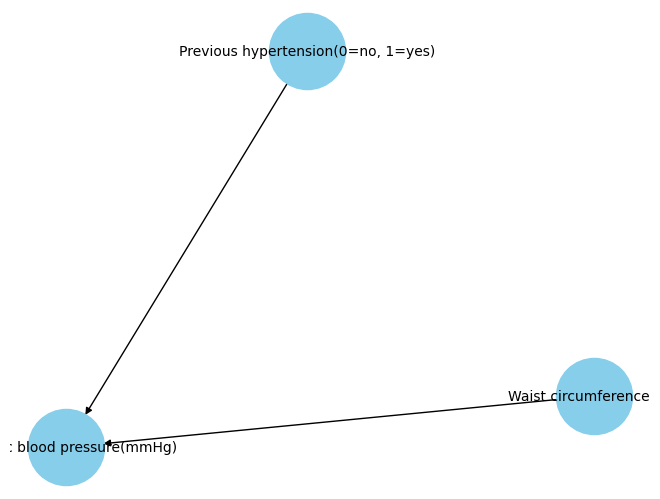

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph(optimized_model.edges())
nx.draw(graph, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.show()

In [69]:
import pandas as pd
import numpy as np
import random
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination


class GeneticAlgorithmBayesianNetwork:
    def __init__(self, data, population_size=20, generations=50, mutation_rate=0.1):
        self.data = data
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.nodes = list(data.columns)

    def _create_valid_network(self):
        network = BayesianNetwork()
        # First add all nodes
        for node in self.nodes:
            network.add_node(node)

        # Then add random edges
        for i in range(len(self.nodes)-1):
            for j in range(i+1, len(self.nodes)):
                if random.random() > 0.7:
                    try:
                        network.add_edge(self.nodes[i], self.nodes[j])
                    except:
                        continue
        return network

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            network = self._create_valid_network()
            population.append(network)
        return population

    def fitness(self, network):
        try:
            return BicScore(self.data).score(network)
        except:
            return float('-inf')

    def crossover(self, parent1, parent2):
        child = BayesianNetwork()
        # Add all nodes first
        for node in self.nodes:
            child.add_node(node)

        # Combine edges from parents
        for edge in set(list(parent1.edges()) + list(parent2.edges())):
            if random.random() < 0.5:
                try:
                    child.add_edge(*edge)
                except:
                    continue
        return child

    def mutate(self, network):
        if random.random() < self.mutation_rate:
            mutated = network.copy()
            if random.random() < 0.5 and mutated.edges():
                # Remove random edge
                edge = random.choice(list(mutated.edges()))
                mutated.remove_edge(*edge)
            else:
                # Add random edge
                node1, node2 = random.sample(self.nodes, 2)
                try:
                    mutated.add_edge(node1, node2)
                except:
                    pass
            return mutated
        return network

    def run(self):
        population = self.initialize_population()
        best_network = None
        best_score = float('-inf')

        for gen in range(self.generations):
            fitness_scores = [self.fitness(network) for network in population]

            current_best = max(fitness_scores)
            if current_best > best_score:
                best_score = current_best
                best_network = population[fitness_scores.index(current_best)]

            selected = []
            for _ in range(self.population_size):
                tournament = random.sample(list(enumerate(fitness_scores)), 3)
                winner_idx = max(tournament, key=lambda x: x[1])[0]
                selected.append(population[winner_idx])

            next_population = []
            for i in range(0, len(selected), 2):
                if i+1 < len(selected):
                    child = self.crossover(selected[i], selected[i+1])
                    child = self.mutate(child)
                    next_population.append(child)

            population = next_population

        return best_network

def predict_metabolic_syndrome(user_input, data_path='dataset.csv'):

    data = pd.read_csv(data_path, skiprows=1, low_memory=False)
    data = data.apply(pd.to_numeric, errors='coerce')
    data.dropna(inplace=True)

    relevant_columns = [
        'Previous fatty liver (0=no, 1=yes)',
        'Previous hypertension(0=no, 1=yes)',
        'Previous diabetes(0=no, 1=yes)',
        'Waist circumference(cm)',
        'Systolic blood pressure(mmHg)',
        'Diastolic blood pressure(mmHg)',
        'Metabolic syndrome(0=no, 1=yes)'
    ]

    data = data[relevant_columns]


    ga = GeneticAlgorithmBayesianNetwork(data)
    model = ga.run()


    model.fit(data, estimator=MaximumLikelihoodEstimator)


    inference = VariableElimination(model)
    evidence = {k: v for k, v in user_input.items()
               if k != 'Metabolic syndrome(0=no, 1=yes)'}

    return inference.query(['Metabolic syndrome(0=no, 1=yes)'], evidence=evidence)

if __name__ == "__main__":
    user_input = {
        'Previous fatty liver (0=no, 1=yes)': 1,
        'Previous hypertension(0=no, 1=yes)': 0,
        'Previous diabetes(0=no, 1=yes)': 1,
        'Waist circumference(cm)': 76,
        'Systolic blood pressure(mmHg)': 139,
        'Diastolic blood pressure(mmHg)': 88
    }

    result = predict_metabolic_syndrome(user_input)
    print("Prediction:", result)


Prediction: +------------------------------------+----------------------------------------+
| Metabolic syndrome(0=no, 1=yes)    |   phi(Metabolic syndrome(0=no, 1=yes)) |
+====================================+========================================+
| Metabolic syndrome(0=no, 1=yes)(0) |                                 0.6358 |
+------------------------------------+----------------------------------------+
| Metabolic syndrome(0=no, 1=yes)(1) |                                 0.3642 |
+------------------------------------+----------------------------------------+
